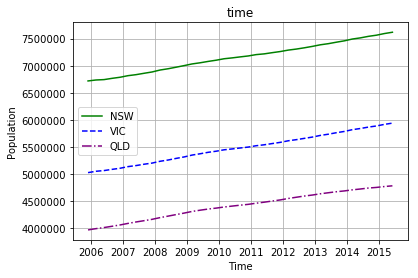

In [6]:
#Task A1  Investigating the Population Data
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import csv

# Taking the transpose of the the csv because otherwise we would have to read the rows instead of columns
#df = pd.read_csv('C:\\Users\\usmanzafar\\Desktop\\JobVacancies.csv', index_col=0, header=None).T

df = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\Assignment1Files\\EstimatedResidentPopulationByStateAndGender.csv',sep=',')
dates = df['time']
nsw = df['Persons,New South Wales']
vic = df ['Persons,Victoria']
qld = df ['Persons,Queensland']

plt.plot_date(x=dates, y=nsw,  fmt="r-", label="NSW",color = 'green', linestyle='solid'  )
plt.plot_date(x=dates, y= vic, fmt="r-", color = 'blue', linestyle ='dashed', label="VIC" )
plt.plot_date(x=dates, y= qld, fmt="r-", color = 'purple', linestyle= 'dashdot', label="QLD")
plt.title("time")
plt.ylabel("Population")
plt.xlabel("Time")
plt.legend(loc='best')
plt.grid(True)
plt.show()

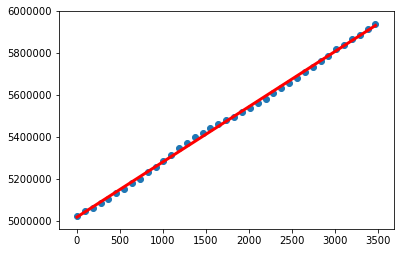

Resident population predicted by the linear fit :
Prediction for 1/9/15: 5029117.2957
Prediction for 1/12/15: 5029643.92331
Prediction for 1/12/16: 5030433.86472
Prediction for 1/12/17: 5031487.11993


In [4]:
#Task A1
#2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import linregress
import csv
df = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\Assignment1Files\\EstimatedResidentPopulationByStateAndGender.csv',sep=',')
vic = df ['Persons,Victoria']

df['time'] = pd.to_datetime(df['time'])    
df['time_delta'] = (df['time'] - df['time'].min())  / np.timedelta64(1,'D')
dates =df['time_delta']

slope, intercept, r_value, p_value, std_err = linregress(dates,df['Persons,Victoria'])
line = [slope*xi + intercept for xi in dates]
plt.plot(dates,line,'r-', linewidth=3)
plt.scatter(dates, df['Persons,Victoria'])
plt.show() 
print ("Resident population predicted by the linear fit :")
prediction1 = slope * 41 + intercept
print ("Prediction for 1/9/15: %s"%prediction1)
prediction2 = slope * 43 + intercept
print ("Prediction for 1/12/15: %s"%prediction2)
prediction3 = slope * 46 + intercept
print ("Prediction for 1/12/16: %s"%prediction3)
prediction4 = slope * 50 + intercept
print ("Prediction for 1/12/17: %s"%prediction4)
#index(41,42,46,50)

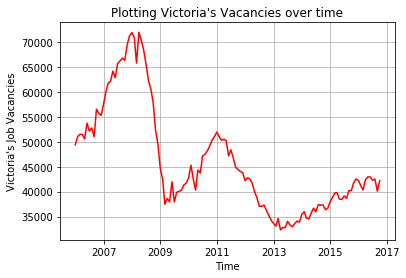

In [134]:
#A2. Investigating the Job Vacancies Data
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import csv

df = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\Assignment1Files\\JobVacancies.csv', index_col=0, header=None).T
df=df.rename(columns = {'State':'Dates'})
dates =  df['Dates']
victoriaJobVacancies = df ['VIC']
plt.plot_date(x=dates, y=victoriaJobVacancies, fmt="r-")
plt.title("Plotting Victoria's Vacancies over time")
plt.ylabel("Victoria's Job Vacancies")
plt.xlabel('Time')
plt.grid(True)
plt.show()

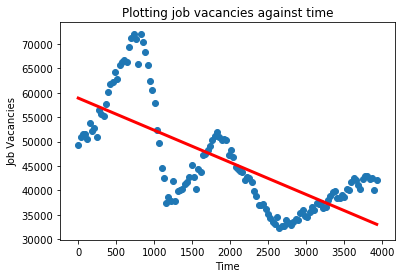

In [168]:
#A2. Investigating the Job Vacancies Data
# without applying the 85th onwards filter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import csv
df = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\Assignment1Files\\JobVacancies.csv', index_col=0, header=None).T
df=df.rename(columns = {'State':'Dates'})

df['Dates'] = pd.to_datetime(df['Dates'])    
df['Dates'] = (df['Dates'] - df['Dates'].min())  / np.timedelta64(1,'D')
dates =df['Dates']
df.VIC = df.VIC.astype(float).fillna(0.0)
victoriaJobVacancies = df ['VIC']
slope, intercept, r_value, p_value, std_err = linregress(dates,victoriaJobVacancies)
line = [slope*xi + intercept for xi in dates]
plt.plot(dates,line,'r-', linewidth=3)
plt.scatter(dates, df['VIC'])
plt.xlabel('Time')
plt.ylabel('Job Vacancies')
plt.title('Plotting job vacancies against time')
plt.show() 

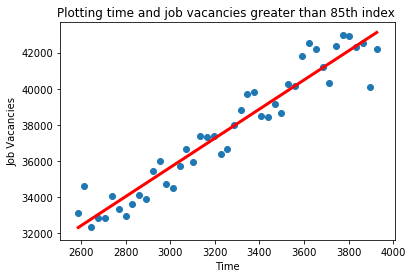

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import csv
df = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\Assignment1Files\\JobVacancies.csv', index_col=0, header=None).T
df=df.rename(columns = {'State':'Dates'})
df['Dates'] = pd.to_datetime(df['Dates'])    
df['Dates'] = (df['Dates'] - df['Dates'].min())  / np.timedelta64(1,'D')
dates =df['Dates']
df.VIC = df.VIC.astype(float).fillna(0.0)
#print (victoriaJobVacancies)
dates= df.Dates.iloc[85:]
dfnew =df.iloc[85:]
victoriaJobVacancies = dfnew ['VIC']
slope, intercept, r_value, p_value, std_err = linregress(dates,victoriaJobVacancies)
line = [slope*xi + intercept for xi in dates]
plt.plot(dates,line,'r-', linewidth=3)
plt.scatter(dates, victoriaJobVacancies)
plt.xlabel('Time')
plt.ylabel('Job Vacancies')
plt.title('Plotting time and job vacancies greater than 85th index ')
plt.show() 


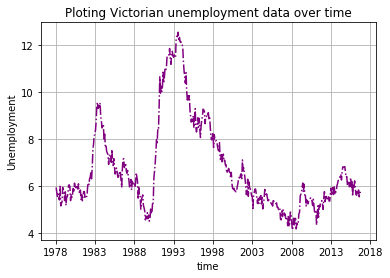

In [12]:
#A3. Investigating the Unemployment Data
#1
from datetime import datetime, timedelta
from __future__ import print_function
from os.path import join, dirname, abspath
import xlrd
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
import matplotlib.dates as mdates
import csv
import numpy as np
from matplotlib import pyplot as plt 
import matplotlib


ufo_reports_xls = pd.read_excel('C:\\Users\\uzaf2\\Downloads\\Assignment1Files\\EmploymentTimeSeries.xls', sheetname='Time Series')
vicFilter = ufo_reports_xls.State == 'VIC'
unemployment = ufo_reports_xls[vicFilter].Unemployment_Rate_over_15
dates = ufo_reports_xls[vicFilter].Dates
plt.plot_date(x=dates, y=unemployment , fmt="r-", color = 'purple', linestyle= 'dashdot')
plt.title("Ploting Victorian unemployment data over time")
plt.ylabel("Unemployment")
plt.xlabel("time")
plt.grid(True)
plt.show()

In [27]:
### Merging the files for Task A4
import pandas as pd
## Here is this code i have metlted the different columns having values for populations for different states
# into one column 
df1 = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\merge\\EstimatedResidentPopulationByStateAndGender.csv',sep=',')
df2 = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\merge\\JobVacancies.csv',index_col = 0, header = None).T

df1= df1.rename(columns= {'time':'Dates'})
df2= df2.rename(columns= {'State':'Dates'})
df1.Dates = pd.to_datetime(df1.Dates)
df2.Dates = pd.to_datetime(df2.Dates)
result = pd.merge(df1, df2, on=['Dates'])
result.to_csv('C:\\Users\\uzaf2\\Downloads\\merge\\preprocessedEndResult.csv',index=False, encoding = 'utf-8')

# then i have manually preprocessed states names from like NewSouthWales to NSW

In [28]:
import pandas as pd
## Here is this code i have metlted the different columns having values for populations for different states
# into one column 
df = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\merge\\preprocessedEndResult.csv',sep=',')
df = pd.melt(df, id_vars=['Dates'],value_vars=['Persons,NSW','Persons,VIC','Persons,QLD','Persons,SA','Persons,WA'
                                                                      ,'Persons,TAS','Persons,NT','Persons,ACT'
                                                                      ,'Persons,Australia'],var_name='Population')
df.to_csv('C:\\Users\\uzaf2\\Downloads\\merge\\melt1.csv',index=False, encoding = 'utf-8')

In [29]:
## HEre we are reading the same file as the previous step
### but are reading the job vacancies of different states into one column
df = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\merge\\preprocessedEndResult.csv',sep=',')
df = pd.melt(df, id_vars=['Dates'],value_vars=['NSW','VIC','QLD','SA','WA','TAS','NT','ACT'],var_name='Job_Vacancies')
df.to_csv('C:\\Users\\uzaf2\\Downloads\\merge\\melt2.csv',index=False, encoding = 'utf-8')

In [30]:
# HEre we are renaming files because we want the columns to have certain names
df1 = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\merge\\melt1.csv',sep=',')
df1 = df1.rename(columns={'Population':'States'})
df1 = df1.rename(columns={'value':'Population'})
df1.to_csv('C:\\Users\\uzaf2\\Downloads\\merge\\melt1.csv',index=False, encoding = 'utf-8')

In [31]:
#HEre we are renaming columns because we want the columns to have certain names
df2 = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\merge\\melt2.csv',sep=',')
df2 = df2.rename(columns={'Job_Vacancies':'States'})
df2 = df2.rename(columns={'value':'Job_Vacancies'})
df2.to_csv('C:\\Users\\uzaf2\\Downloads\\merge\\melt2.csv',index=False, encoding = 'utf-8')

In [32]:
# Here i am modifying the the names of the states as like Persons,NSW  i want to like NSW, so i am slcing them
df1 = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\merge\\melt1.csv',sep=',')
df1.States = df1.States.str.slice(8, 12)

In [33]:
# Rewriting the result to the same file
df1.to_csv('C:\\Users\\uzaf2\\Downloads\\merge\\melt1.csv',index=False, encoding = 'utf-8')

In [34]:
#And now doing the here i am merging the two merge files i have created for efficient preprocessing of the data
df1 = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\merge\\melt1.csv',sep=',')
df2 = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\merge\\melt2.csv',sep=',')
result = pd.merge(df1, df2, on=['Dates', 'States'])
result.to_csv('C:\\Users\\uzaf2\\Downloads\\merge\\result1.csv',index=False, encoding = 'utf-8')

In [52]:
# THis is the final stage of the merge as we have already merged the jobvacancies and population table and processed 
# the final product, now we would merge it with the employment Time series file
empTimeSeries = pd.read_excel('C:\\Users\\uzaf2\\Downloads\\merge\\EmploymentTimeSeries.xls', sheetname='Time Series')
result1 = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\merge\\result1.csv',sep=',')
# Here is changed the name of the column State/Territory to States and Date to Dates 
# This was done to facilitate the merge
empTimeSeries.Dates = pd.to_datetime(empTimeSeries.Dates)
result1.Dates = pd.to_datetime(result1.Dates)
threeTablesMerged = pd.merge(empTimeSeries, result1, on=['Dates','States'])
threeTablesMerged.to_csv('C:\\Users\\uzaf2\\Downloads\\merge\\threeTablesMerged.csv',index=False, encoding = 'utf-8')

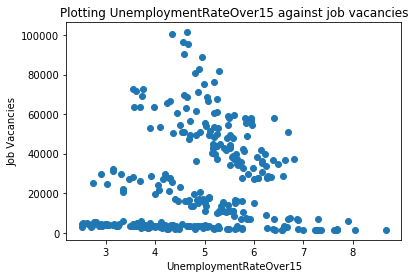

In [53]:
# Here is have changed the name of one column from Unemployment Rate (15+) to UnemploymentRateOver15
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
df = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\merge\\threeTablesMerged.csv',sep=',')
plt.scatter(df['UnemploymentRateOver15'], df['Job_Vacancies'])
plt.xlabel('UnemploymentRateOver15')
plt.ylabel('Job Vacancies')
plt.title('Plotting UnemploymentRateOver15 against job vacancies')
plt.show()

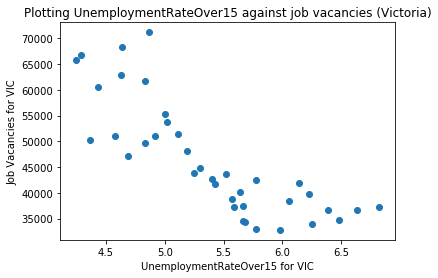

In [54]:
#Task A4. 3 
filter = df.States == 'VIC'
dfVic = df [filter]
VICnemployment =  dfVic.UnemploymentRateOver15
VICjobvacancies = dfVic.Job_Vacancies
plt.scatter(VICnemployment, VICjobvacancies)
plt.xlabel('UnemploymentRateOver15 for VIC')
plt.ylabel('Job Vacancies for VIC')
plt.title('Plotting UnemploymentRateOver15 against job vacancies (Victoria)')
plt.show()

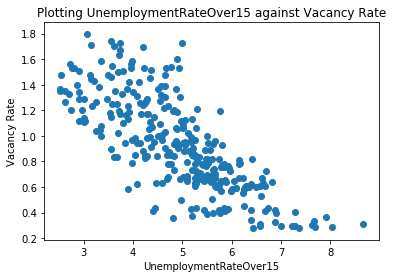

In [55]:
#Task A4. 4
# Here i am calculating the vacancy rate by dividing the Job_vacancies and Population and storing the result back to 
# the original file
df = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\merge\\threeTablesMerged.csv',sep=',')
df['Job_Vacancies'] = pd.to_numeric(df['Job_Vacancies'], errors='coerce').fillna(0)
df['Population'] = pd.to_numeric(df['Population'], errors='coerce').fillna(0)
df['VacancyRate'] = (df['Job_Vacancies'] /  df['Population']) * 100
df.to_csv('C:\\Users\\uzaf2\\Downloads\\merge\\threeTablesMerged.csv',index=False, encoding = 'utf-8')
df = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\merge\\threeTablesMerged.csv',sep=',')
plt.scatter(df['UnemploymentRateOver15'], df['VacancyRate'])
plt.xlabel('UnemploymentRateOver15')
plt.ylabel('Vacancy Rate')
plt.title('Plotting UnemploymentRateOver15 against Vacancy Rate')
plt.show()

In [1]:
#Task A5 Motion Chart
from motionchart.motionchart import MotionChart
import pandas as pd

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [3]:
# read in the sample data from data.csv
mergedData = pd.read_csv('C:\\Users\\usmanzafar\\Desktop\\threeTablesMerged.csv')
# have a look at the dataframe, it should be exactly the same as the one we had before
mChart = MotionChart(df= mergedData, key= 'Dates',x = 'VacancyRate', y = 'UnemploymentRateOver15', xscale= 'linear', yscale='linear', size='Population',
                  category='States')
mChart.to_notebook()

In [62]:
#Task B: Exploratory Analysis on Big Data
#B1. Summarising the Data
#1
import pandas as pd
insuranceData = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\Assignment1Files\\InsuranceRates.csv')
print (insuranceData.shape)


(12694445, 7)


In [63]:
# 2
insuranceData = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\Assignment1Files\\InsuranceRates.csv')
s = pd.value_counts(insuranceData.BusinessYear)
s1=pd.Series({'unique': len(s),'unique values of Business Year': s.index.tolist()})
print (s1)

unique                                             3
unique values of Business Year    [2015, 2016, 2014]
dtype: object


In [65]:
#3
insuranceData = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\Assignment1Files\\InsuranceRates.csv')
s = pd.value_counts(insuranceData.Age)
s1=pd.Series({'unique': len(s),'unique values of Age': s.index.tolist()})
print (s1)

unique                                                                 47
unique values of Age    [0-20, 63, 46, 44, 53, 49, 43, 36, 23, 28, 58,...
dtype: object


In [69]:
#4
insuranceData = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\Assignment1Files\\InsuranceRates.csv')
s = pd.value_counts(insuranceData.StateCode)
s1=pd.Series({'unique': len(s),'unique values for State Codes': s.index.tolist()})
print (s1)

unique                                                                          39
unique values for State Codes    [FL, SC, MI, WI, OH, TX, IN, PA, GA, IL, NC, A...
dtype: object


In [68]:
#5
insuranceData = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\Assignment1Files\\InsuranceRates.csv')
s = pd.value_counts(insuranceData.IssuerId)
s1=pd.Series({'unique': len(s),'unique values for insurance issuers': s.index.tolist()})
print (s1)

unique                                                                               910
unique values for insurance issuers    [49532, 15560, 33602, 16842, 84670, 50816, 381...
dtype: object


          BusinessYear StateCode  IssuerId          PlanId            Age  \
0                 2014        AK     21989  21989AK0010001           0-20   
1                 2014        AK     21989  21989AK0020001  Family Option   
2                 2014        AK     21989  21989AK0020001  Family Option   
3                 2014        AK     21989  21989AK0010001             21   
4                 2014        AK     21989  21989AK0010001             22   
5                 2014        AK     21989  21989AK0020001  Family Option   
6                 2014        AK     21989  21989AK0020002  Family Option   
7                 2014        AK     21989  21989AK0010001             23   
8                 2014        AK     21989  21989AK0010001             24   
9                 2014        AK     21989  21989AK0020002  Family Option   
10                2014        AK     21989  21989AK0020002  Family Option   
11                2014        AK     21989  21989AK0010001             25   

In [103]:
#6
insuranceData['IndividualTobaccoRate'].fillna(0, inplace=True)
insuranceData['insurancepremium'] = insuranceData['IndividualRate'] + insuranceData['IndividualTobaccoRate']
max=insuranceData['insurancepremium'].max()
min = insuranceData['insurancepremium'].min()
mean = insuranceData['insurancepremium'].mean()
print ("insurance premium maximum %s"%(max))
print("insurance premium minimum %s"%(min))
print ("insurance premium average %s"%(mean))
insuranceData.to_csv('C:\\Users\\uzaf2\\Downloads\\Assignment1Files\\InsuranceRates.csv',index=False, encoding = 'utf-8')

insurance premium maximum 999999.0
insurance premium minimum 0.0
insurance premium average 4309.274303666303


In [78]:
#7
import pandas as pd
#from matplotlib import pyplot as plt 
import matplotlib.pyplot as plt
%matplotlib inline
insurance_reports = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\Assignment1Files\\InsuranceRates.csv')
print (insurance_reports)
## df1 as an example data frame 
## col1 name of column for which you want to calculate the nan values
sum(pd.isnull(insurance_reports['IndividualTobaccoRate']))

          BusinessYear StateCode  IssuerId          PlanId            Age  \
0                 2014        AK     21989  21989AK0010001           0-20   
1                 2014        AK     21989  21989AK0020001  Family Option   
2                 2014        AK     21989  21989AK0020001  Family Option   
3                 2014        AK     21989  21989AK0010001             21   
4                 2014        AK     21989  21989AK0010001             22   
5                 2014        AK     21989  21989AK0020001  Family Option   
6                 2014        AK     21989  21989AK0020002  Family Option   
7                 2014        AK     21989  21989AK0010001             23   
8                 2014        AK     21989  21989AK0010001             24   
9                 2014        AK     21989  21989AK0020002  Family Option   
10                2014        AK     21989  21989AK0020002  Family Option   
11                2014        AK     21989  21989AK0010001             25   

7762096

In [81]:
import pandas as pd
## df1 as an example data frame 
## col1 name of column for which you want to calculate the nan values
sum(pd.isnull(insurance_reports['IndividualTobaccoRate']))

7762096

In [82]:
insurance_reports.shape

(12694445, 7)

In [83]:
insurance_reports['IndividualTobaccoRate'].sum()

2681674150.787555

(0, 15000000)

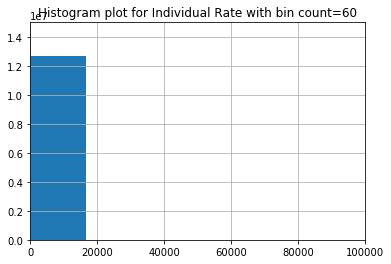

In [338]:
#B2. Investigating Individual Insurance Costs
#1.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
insurance_reports = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\Assignment1Files\\InsuranceRates.csv',sep=',')
insurance_reports.IndividualRate.hist(bins=60)
plt.title("Histogram plot for Individual Rate with bin count=60")
plt.xlim(0,100000)
plt.ylim(0,15000000)

(0, 15000000)

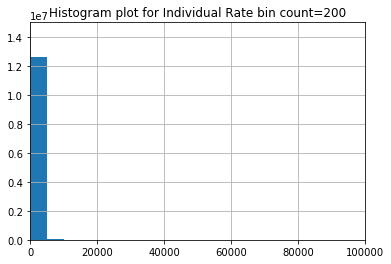

In [337]:
#B2. Investigating Individual Insurance Costs
#1.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
insurance_reports = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\Assignment1Files\\InsuranceRates.csv',sep=',')
insurance_reports.IndividualRate.hist(bins=200)
plt.title("Histogram plot for Individual Rate bin count=200")
plt.xlim(0,100000)
plt.ylim(0,15000000)

(0, 750000)

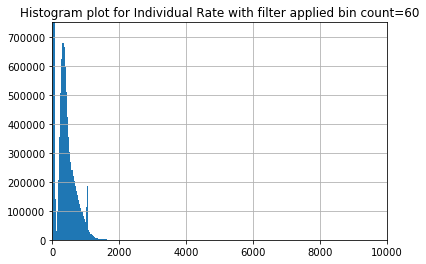

In [342]:
#B2. Investigating Individual Insurance Costs
#2.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
insurance_reports = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\Assignment1Files\\InsuranceRates.csv',sep=',')
filter = ((insurance_reports['IndividualRate'] > 0) &(insurance_reports['IndividualRate'] <=2000))
insurance_reports = insurance_reports[filter]
insurance_reports.IndividualRate.hist(bins=60)
plt.title("Histogram plot for Individual Rate with filter applied bin count=60")
plt.xlim(0,10000)
plt.ylim(0,750000)

(0, 750000)

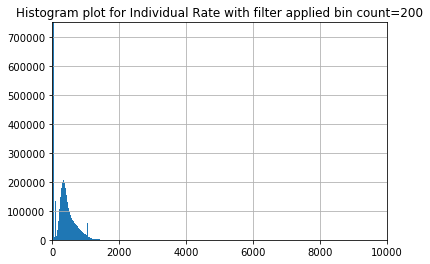

In [341]:
#B2. Investigating Individual Insurance Costs
#2.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
insurance_reports = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\Assignment1Files\\InsuranceRates.csv',sep=',')
filter = ((insurance_reports['IndividualRate'] > 0) &(insurance_reports['IndividualRate'] <=2000))
insurance_reports = insurance_reports[filter]
insurance_reports.IndividualRate.hist(bins=200)
plt.title("Histogram plot for Individual Rate with filter applied bin count=200")
plt.xlim(0,10000)
plt.ylim(0,750000)

(0, 750000)

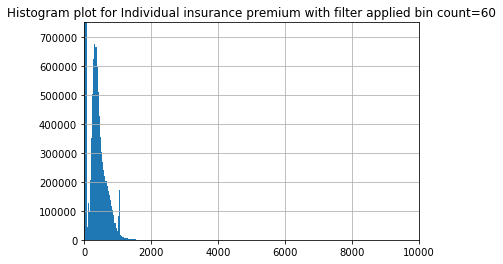

In [340]:
#B2. Investigating Individual Insurance Costs
#2.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
insurance_reports = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\Assignment1Files\\InsuranceRates.csv',sep=',')
filter = ((insurance_reports['insurancepremium'] > 0) &(insurance_reports['insurancepremium'] <=2000))
insurance_reports = insurance_reports[filter]
insurance_reports.IndividualRate.hist(bins=60)
plt.title("Histogram plot for Individual insurance premium with filter applied bin count=60")
plt.xlim(0,10000)
plt.ylim(0,750000)

(0, 750000)

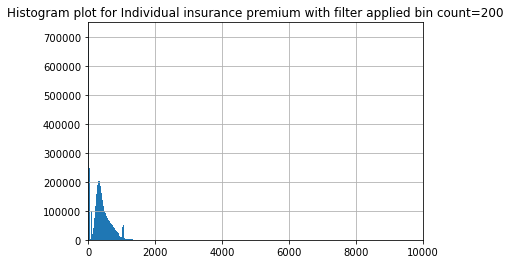

In [339]:
#B2. Investigating Individual Insurance Costs
#2.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
insurance_reports = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\Assignment1Files\\InsuranceRates.csv',sep=',')
filter = ((insurance_reports['insurancepremium'] > 0) &(insurance_reports['insurancepremium'] <=2000))
insurance_reports = insurance_reports[filter]
insurance_reports.IndividualRate.hist(bins=200)
plt.title("Histogram plot for Individual insurance premium with filter applied bin count=200")
plt.xlim(0,10000)
plt.ylim(0,750000)

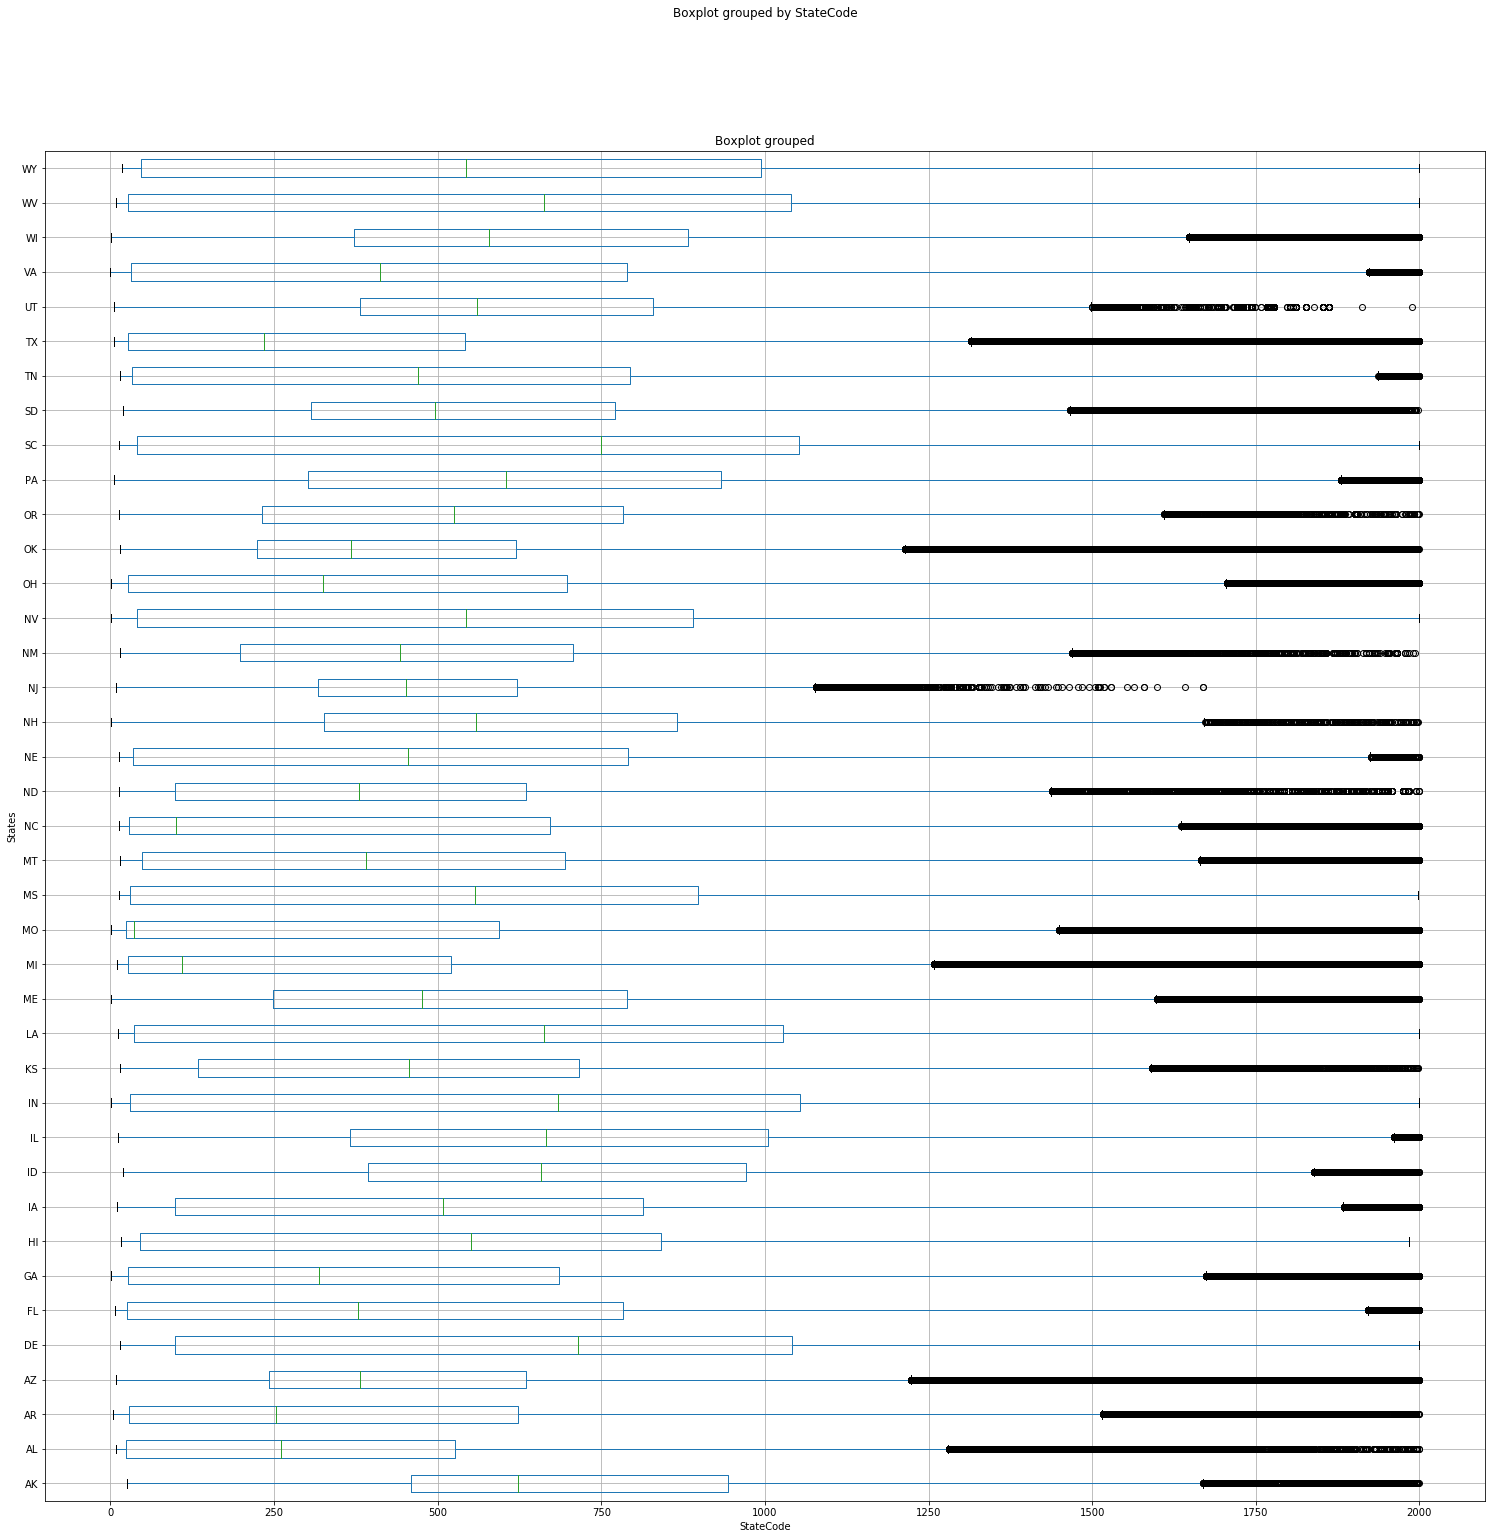

In [335]:
#B3. Variation in Costs across States
#1
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
df = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\Assignment1Files\\InsuranceRates.csv',sep=',')
df.drop_duplicates()
filter = (df['insurancepremium'] > 0) &(df['insurancepremium'] <= 2000)
df= df[filter]
fig, ax = plt.subplots(figsize=(25,25))
plt.ylabel('States')
plt.xlabel('insurance premium')
df.boxplot(['insurancepremium'],'StateCode',ax,vert=False,)
plt.title('Boxplot grouped')
plt.show()

In [118]:
#B3. Variation in Costs across States
#2
import pandas as pd
#from matplotlib import pyplot as plt 
import matplotlib.pyplot as plt
%matplotlib inline
insurance_reports = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\Assignment1Files\\InsuranceRates.csv')
## df1 as an example data frame 
## col1 name of column for which you want to calculate the nan values
sum(pd.isnull(insurance_reports['IndividualTobaccoRate']))
fun = {'IssuerId':{'Insurer':'count'}}
insurance_reports.drop_duplicates()
groupbyClass = insurance_reports.groupby('StateCode').agg(fun)
groupbyClass = groupbyClass.add_suffix('_Count').reset_index()
groupbyClass.set_index('StateCode', inplace=True)

C:\Users\uzaf2\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\groupby.py:3961: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [119]:
print (groupbyClass)

          IssuerId_Count
           Insurer_Count
StateCode               
AK                 84412
AL                196896
AR                 84790
AZ                350032
DE                 15928
FL               1702472
GA                472012
HI                  1518
IA                170610
ID                 69442
IL                432827
IN                677393
KS                113504
LA                172060
ME                 72752
MI               1023190
MO                148948
MS                 42482
MT                148632
NC                365684
ND                104408
NE                 80902
NH                 18176
NJ                173175
NM                 37832
NV                 32016
OH                884530
OK                186472
OR                 68402
PA                475022
SC               1563770
SD                 76000
TN                155994
TX                859714
UT                 85398
VA                325316
WI               1013278


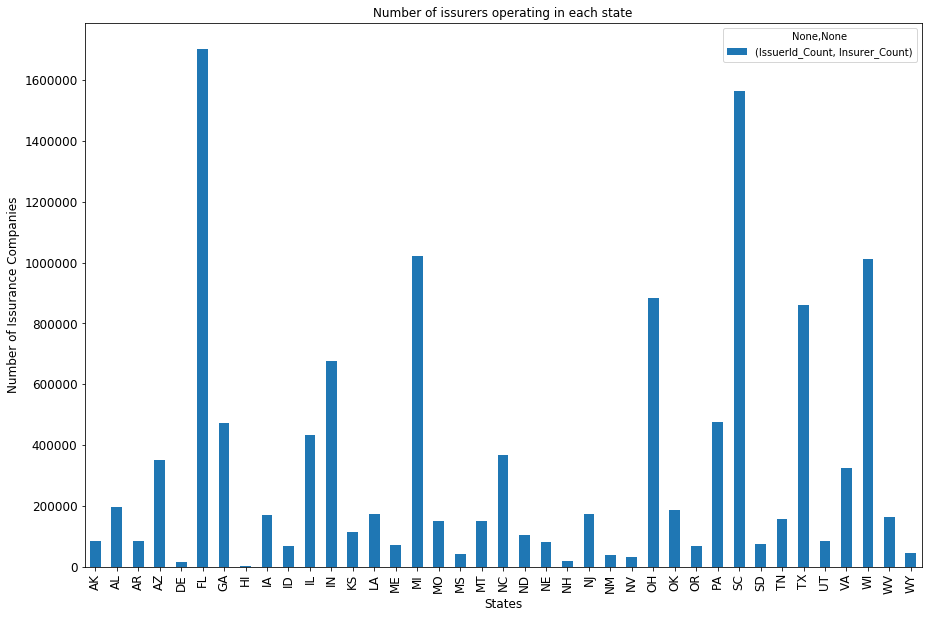

In [120]:
#B3. Variation in Costs across States
#2
import matplotlib.pyplot as plt
#groupbyClass.set_index('StateCode', inplace=True)
ax1 = groupbyClass[['StateCode','IssuerId_Count']].plot(kind='bar', title ="Number of issurers operating in each state", figsize=(15, 10), legend=True, fontsize=12)
ax1.set_xlabel("States", fontsize=12)
ax1.set_ylabel("Number of Issurance Companies", fontsize=12)
plt.show()

In [121]:
#B3. Variation in Costs across States
#3
import pandas as pd
#from matplotlib import pyplot as plt 
import matplotlib.pyplot as plt
%matplotlib inline
insurance_reports = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\Assignment1Files\\InsuranceRates.csv')
#insurance_reports.IndividualTobaccoRate.fillna(0)
#insurance_reports['IndividualTobaccoRate'].fillna(0, inplace=True)

#insurance_reports['combined_premium'] = insurance_reports['IndividualRate'] + insurance_reports['IndividualTobaccoRate']
print (insurance_reports)

          BusinessYear StateCode  IssuerId          PlanId            Age  \
0                 2014        AK     21989  21989AK0010001           0-20   
1                 2014        AK     21989  21989AK0020001  Family Option   
2                 2014        AK     21989  21989AK0020001  Family Option   
3                 2014        AK     21989  21989AK0010001             21   
4                 2014        AK     21989  21989AK0010001             22   
5                 2014        AK     21989  21989AK0020001  Family Option   
6                 2014        AK     21989  21989AK0020002  Family Option   
7                 2014        AK     21989  21989AK0010001             23   
8                 2014        AK     21989  21989AK0010001             24   
9                 2014        AK     21989  21989AK0020002  Family Option   
10                2014        AK     21989  21989AK0020002  Family Option   
11                2014        AK     21989  21989AK0010001             25   

In [234]:
#B3. Variation in Costs across States
#3
fun = {'IssuerId':{'Insurer':'count'},'combined_premium':{'AveragePremium':'mean'}}
insurance_reports.drop_duplicates()
groupbyClass = insurance_reports.groupby('StateCode').agg(fun)
groupbyClass = groupbyClass.add_suffix('').reset_index()
print (groupbyClass)
groupbyClass.set_index('StateCode', inplace=True)


C:\Users\uzaf2\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\groupby.py:3961: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


   StateCode IssuerId combined_premium
              Insurer   AveragePremium
0         AK    84412      7084.132952
1         AL   196896     12189.340324
2         AR    84790     15202.585629
3         AZ   350032      4079.673450
4         DE    15928       689.514221
5         FL  1702472       527.617662
6         GA   472012      6549.090364
7         HI     1518       548.830975
8         IA   170610       544.849365
9         ID    69442     18828.912066
10        IL   432827       691.142084
11        IN   677393      5251.874324
12        KS   113504     11555.710433
13        LA   172060      9035.933027
14        ME    72752       544.867473
15        MI  1023190      3132.762631
16        MO   148948     12450.502495
17        MS    42482     13271.998126
18        MT   148632      5289.874497
19        NC   365684      8296.843058
20        ND   104408      7297.701030
21        NE    80902      9351.269579
22        NH    18176       588.160029
23        NJ   173175    

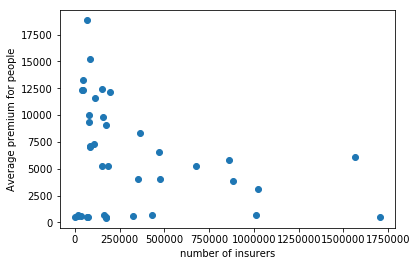

In [123]:
groupbyClass = groupbyClass.reset_index(drop=True)
#print(groupbyClass['IssuerId'])
#print(groupbyClass['combined_premium'])
plt.scatter(groupbyClass['IssuerId'], groupbyClass['combined_premium'])
plt.xlabel('number of insurers')
plt.ylabel('Average premium for people')
plt.show()

(0, 600)

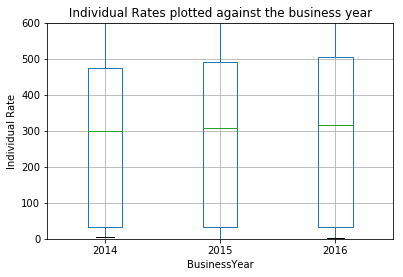

In [124]:
#B4. Variation in Costs over Time and with Age
#1
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
df = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\Assignment1Files\\InsuranceRates.csv',sep=',')
filter = (df['IndividualRate'] > 0) &(df['IndividualRate'] <= 2000)
df =df [filter]
df.boxplot(column = 'IndividualRate', by = 'BusinessYear')
plt.suptitle('')
plt.title(' Individual Rates plotted against the business year ')
plt.ylabel('Individual Rate')
plt.ylim(0, 600)

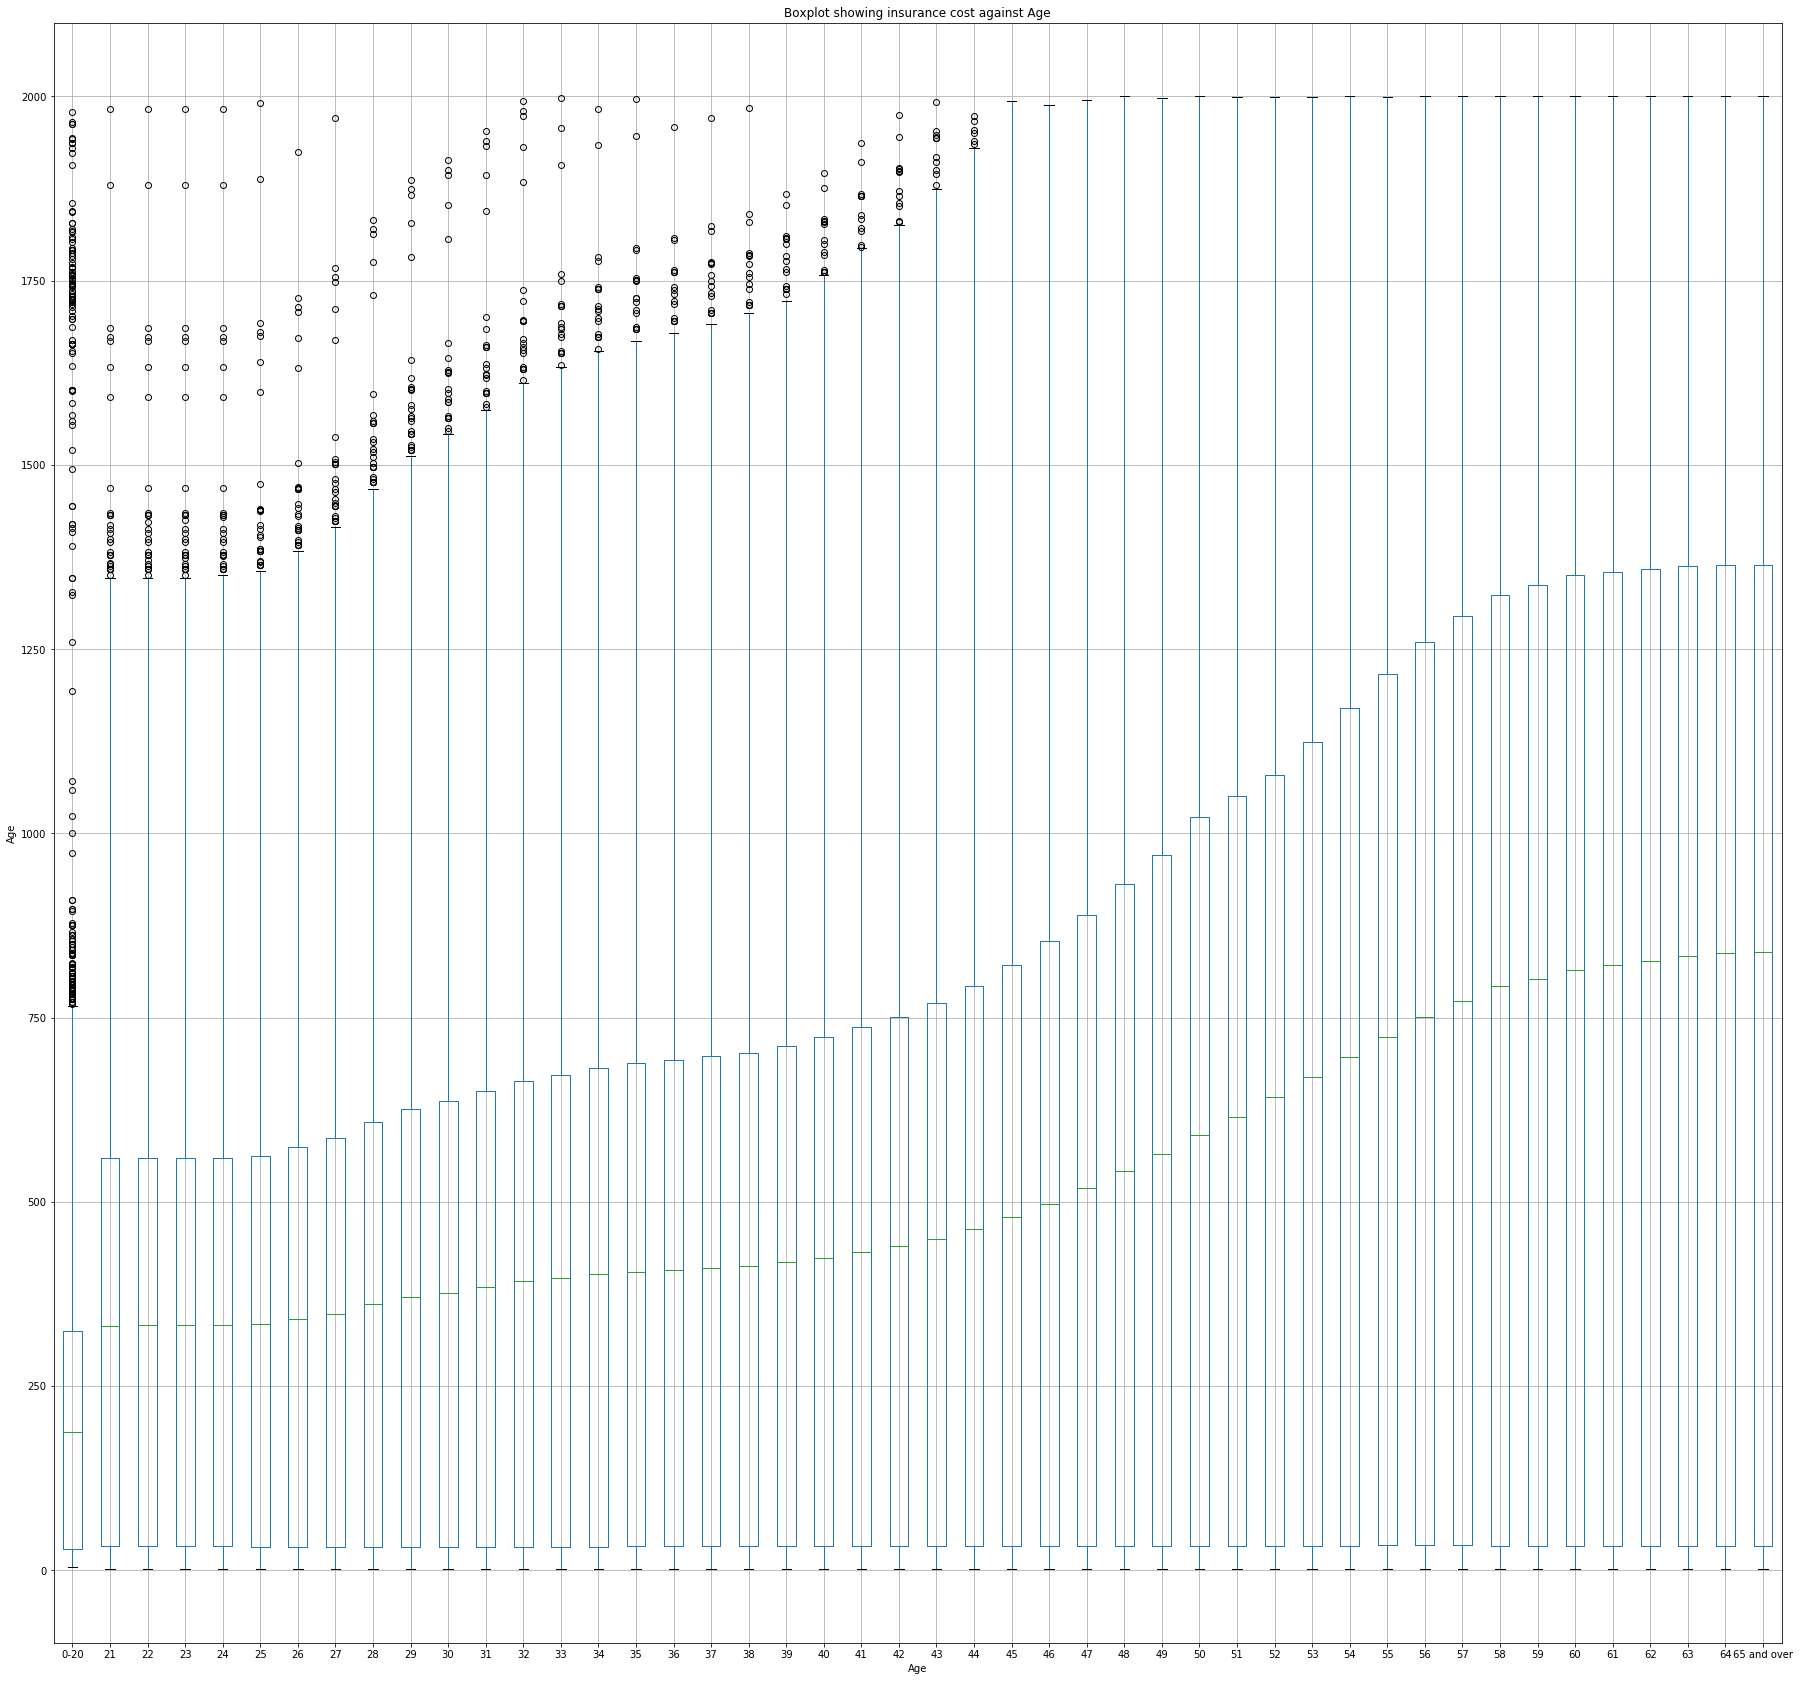

In [133]:
#B4. Variation in Costs over Time and with Age
#2
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
df = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\Assignment1Files\\InsuranceRates.csv',sep=',')
df.drop_duplicates()
filter = (df['insurancepremium'] > 0) &(df['insurancepremium'] <= 2000)&(df['Age'] != 'Family Option')
df= df[filter]
fig, ax = plt.subplots(figsize=(30,30))
plt.ylabel('Age')
plt.xlabel('insurance cost')
df.boxplot(['insurancepremium'],'Age',ax,vert=True,)
plt.title('Boxplot showing insurance cost against Age')
plt.suptitle('')
plt.show()

In [169]:
#Start of the Task C
import pandas as pd
unemployment = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\unemployment\\output.csv')
unemployment.head()

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6


In [170]:
unemployment.shape

(885548, 5)

In [171]:
s = pd.value_counts(unemployment.Year)
s1=pd.Series({'unique': len(s),'unique values of year': s.index.tolist()})
print (s1)

unique                                                                  27
unique values of year    [2011, 2014, 2010, 2016, 2013, 1996, 1997, 200...
dtype: object


In [172]:
s = pd.value_counts(unemployment.State)
s1=pd.Series({'unique': len(s),'unique values of States': s.index.tolist()})
print (s1)

unique                                                                    47
unique values of States    [Texas, Virginia, Missouri, Kentucky, Kansas, ...
dtype: object


In [173]:
unemployment.Rate.mean()

6.175009711500733

In [174]:
import pandas as pd
unemployment = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\unemployment\\output.csv')
print(unemployment)

        Year     Month        State                  County  Rate
0       2015  February  Mississippi           Newton County   6.1
1       2015  February  Mississippi           Panola County   9.4
2       2015  February  Mississippi           Monroe County   7.9
3       2015  February  Mississippi            Hinds County   6.1
4       2015  February  Mississippi           Kemper County  10.6
5       2015  February  Mississippi          Calhoun County   6.9
6       2015  February  Mississippi           Clarke County   7.9
7       2015  February  Mississippi        Jefferson County  14.3
8       2015  February  Mississippi          Madison County   4.5
9       2015  February  Mississippi          Sharkey County  11.1
10      2015  February  Mississippi           Tunica County  11.5
11      2015  February  Mississippi             Tate County   7.6
12      2015  February  Mississippi        Lafayette County   5.5
13      2015  February  Mississippi          Bolivar County   8.6
14      20

In [175]:
unemployment = unemployment.sort_values(by='Year', ascending=1)
unemployment.to_csv('C:\\Users\\uzaf2\\Downloads\\sorted.csv',index=False, encoding = 'utf-8')

In [307]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
unemployment = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\unemployment\\output.csv')
unemployment = unemployment.sort_values(by='Year', ascending=1)
unemployment.to_csv('C:\\Users\\uzaf2\\Downloads\\unemployment\\output.csv',index=False, encoding = 'utf-8')
filter = unemployment.Year == 1990

C:\Users\uzaf2\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\uzaf2\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\groupby.py:3961: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


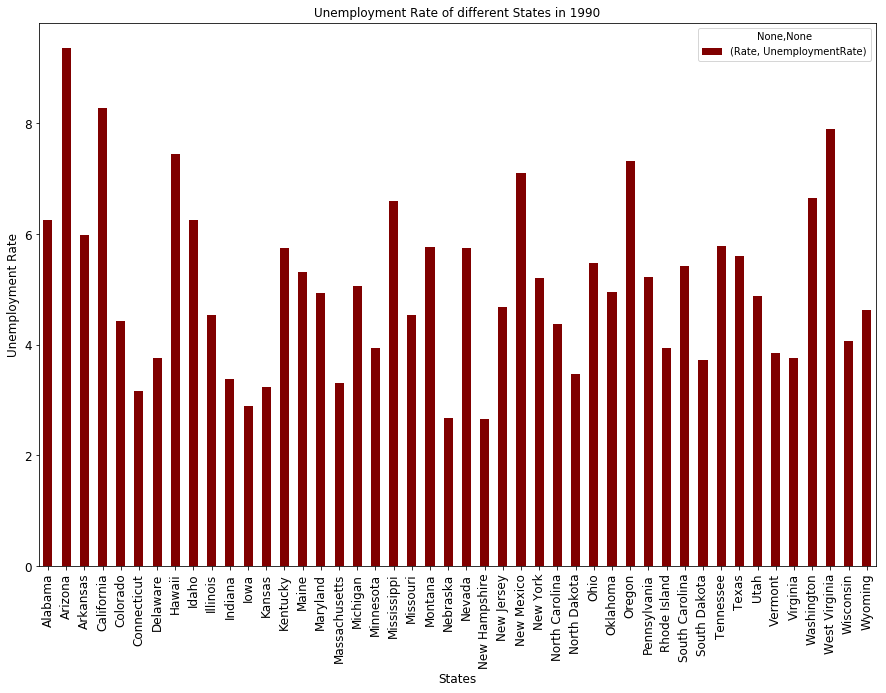

In [328]:
import matplotlib.pyplot as plt
unemployment1990 = unemployment[filter]
unemployment1990= pd.DataFrame(unemployment1990)
unemployment1990 = unemployment1990.reset_index(drop=True)


fun = {'Rate':{'UnemploymentRate':'mean'}}
groupbyStates = unemployment1990.groupby('State').agg(fun)
groupbyStates = groupbyStates.add_suffix('').reset_index()
#print (groupbyClass3)
groupbyStates.set_index('State', inplace=True)
#groupbyClass4 = groupbyClass4.reset_index(drop=True)
ax2 = groupbyStates[['State','Rate']].plot(kind='bar', title ="Number of issurers operating in each state", figsize=(15, 10), legend=True, fontsize=12,color='maroon')
ax2.set_xlabel("States", fontsize=12)
ax2.set_ylabel("Unemployment Rate", fontsize=12)
ax2.set_title('Unemployment Rate of different States in 1990')
plt.show()


        Year    Month        State                  County  Rate
0       1990  January     New York          Steuben County   6.7
1       1990   August        Texas        Childress County   4.5
2       1990   August        Texas        Fort Bend County   3.7
3       1990   August        Texas           Zavala County  17.1
4       1990   August        Texas            Terry County   6.2
5       1990   August        Texas           Dimmit County  11.6
6       1990   August        Texas        Somervell County  13.9
7       1990   August        Texas           Parker County   4.4
8       1990   August        Texas         Franklin County   5.6
9       1990   August        Texas             Hood County   8.4
10      1990   August        Texas           Martin County   1.9
11      1990   August        Texas          Cameron County  12.7
12      1990   August        Texas             Clay County   4.3
13      1990   August        Texas           Kimble County   2.1
14      1990   August    

C:\Users\uzaf2\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\groupby.py:3961: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


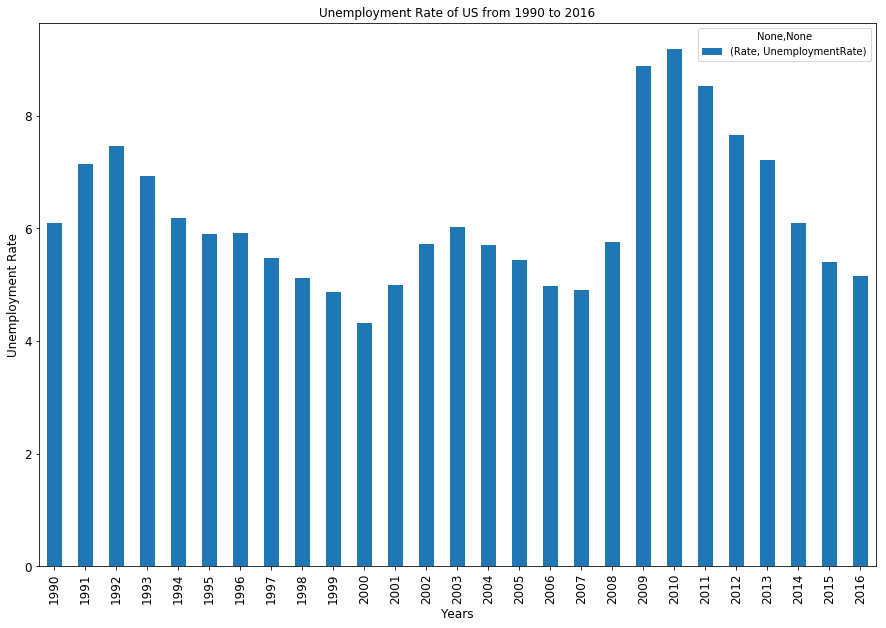

In [309]:
import matplotlib.pyplot as plt
unemployment = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\unemployment\\output.csv')
print(unemployment)
fun = {'Rate':{'UnemploymentRate':'mean'}}
groupbyYear = unemployment.groupby('Year').agg(fun)

groupbyYear = groupbyYear.add_suffix('').reset_index()
#print (groupbyClass3)

groupbyYear.set_index('Year', inplace=True)
groupbyYearLineGraph =groupbyYear
#print (groupbyYear)
#groupbyYear = groupbyYear.reset_index(drop=True)
ax2 = groupbyYear[['Year','Rate']].plot(kind='bar', title ="Unemployment Rate of US from 1990 to 2016", figsize=(15, 10), legend=True, fontsize=12)
ax2.set_xlabel("Years", fontsize=12)
ax2.set_ylabel("Unemployment Rate", fontsize=12)
plt.show()

C:\Users\uzaf2\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\groupby.py:3961: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


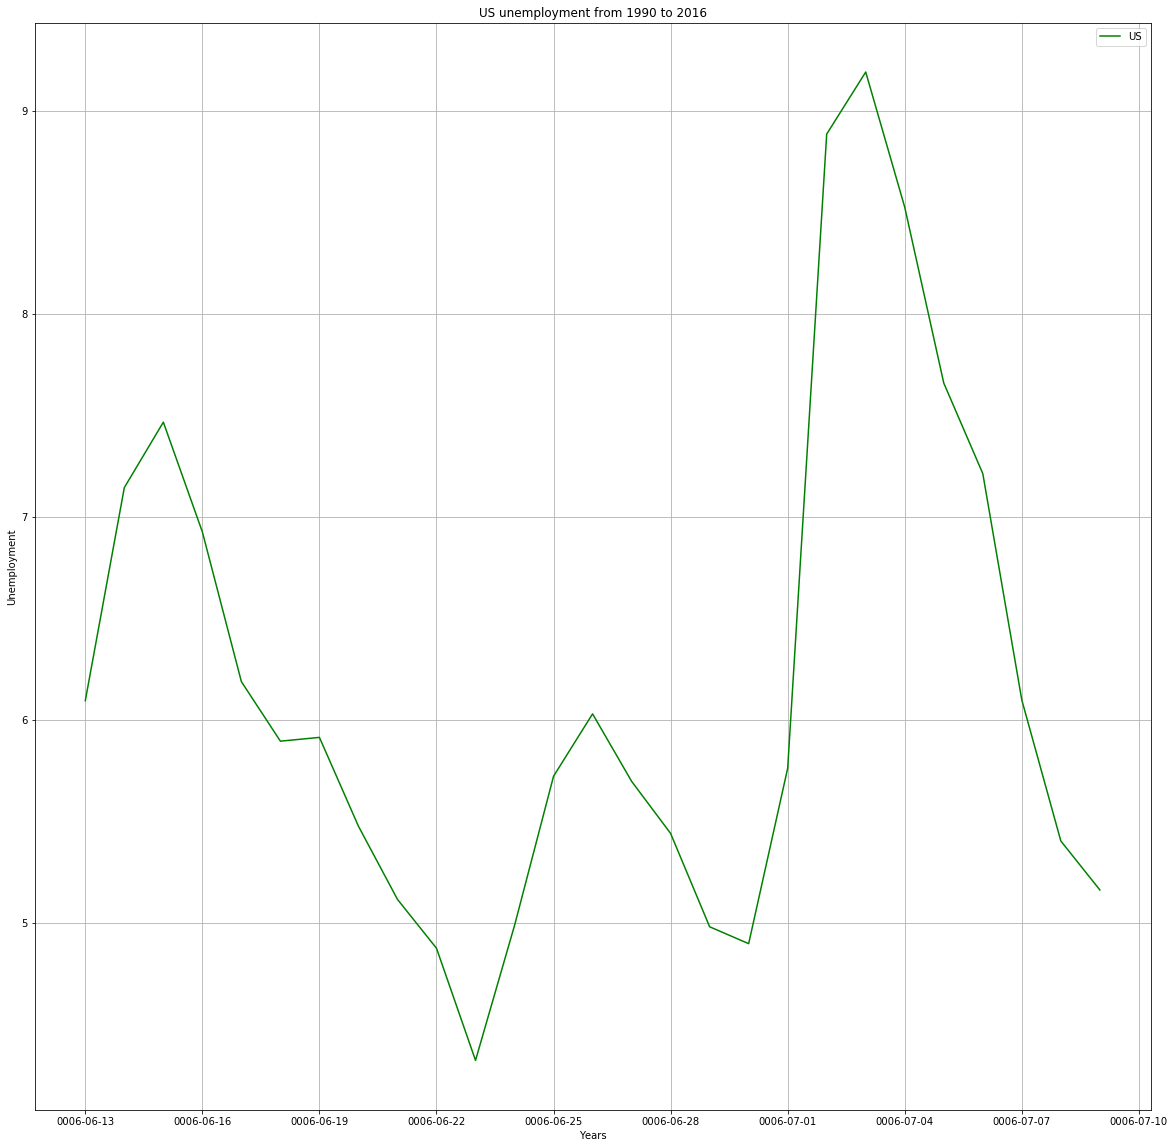

In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import csv

unemployment = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\unemployment\\output.csv')
fun = {'Rate':{'UnemploymentRate':'mean'}}
groupbyYearLineGraph = unemployment.groupby('Year').agg(fun)
groupbyYearLineGraph = groupbyYearLineGraph.add_suffix('').reset_index()

groupbyYearLineGraph = groupbyYearLineGraph.reset_index(drop=True)

fig, ax = plt.subplots(figsize=(20,20))
dates= groupbyYearLineGraph['Year']
plt.plot_date(x=dates, y=groupbyYearLineGraph['Rate'], fmt="r-", label="US",color = 'green', linestyle='solid')
plt.title("US unemployment from 1990 to 2016")
plt.ylabel("Unemployment")
plt.xlabel("Years")
plt.legend(loc='best')
plt.grid(True)
plt.plot(figsize=(50,50))
plt.show()






C:\Users\uzaf2\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\groupby.py:3961: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


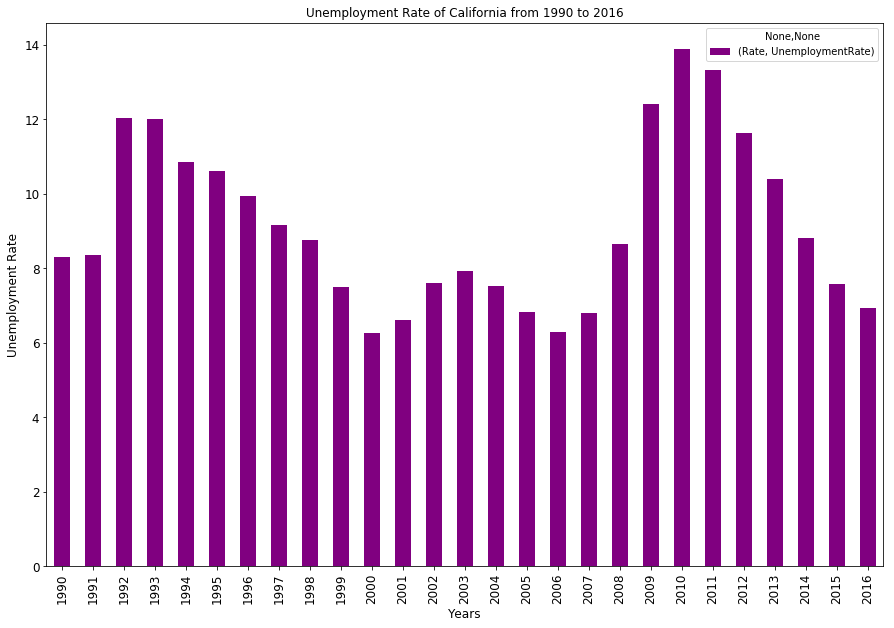

In [329]:
import matplotlib.pyplot as plt
unemployment = pd.read_csv('C:\\Users\\uzaf2\\Downloads\\unemployment\\output.csv')
californiaFilter = unemployment.State== 'California'
data= unemployment[californiaFilter]
data = data.reset_index(drop=True)
#print (data)
fun = {'Rate':{'UnemploymentRate':'mean'}}
groupbyYearCalifornia = data.groupby('Year').agg(fun)
groupbyYearCalifornia = groupbyYearCalifornia.add_suffix('').reset_index()
groupbyYearCalifornia.set_index('Year', inplace=True)
ax3 = groupbyYearCalifornia[['Year','Rate']].plot(kind='bar', title ="Unemployment Rate of California from 1990 to 2016", figsize=(15, 10), legend=True, fontsize=12, color='purple')
ax3.set_xlabel("Years", fontsize=12)
ax3.set_ylabel("Unemployment Rate", fontsize=12)
plt.show()